In [ ]:
import pandas as pd
import os

# base_path = os.path.dirname(__file__)  # folder of py file
base_path = os.getcwd() # folder of jupyter notebook
csv_path = os.path.join(base_path, "Data", "ad_10000records.csv")

data = pd.read_csv(csv_path)


In [33]:

data = pd.read_csv(csv_path)
# check column orders and names and the first few rows see if we need to transfer data types
pd.set_option("display.max_columns", None)
print(data.head(3))
print(data.shape)


   Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                     62.26  32.0     69481.85                172.83   
1                     41.73  31.0     61840.26                207.17   
2                     44.40  30.0     57877.15                172.83   

                         Ad Topic Line             City  Gender  \
0      Decentralized real-time circuit         Lisafort    Male   
1       Optional full-range projection  West Angelabury    Male   
2  Total 5thgeneration standardization        Reyesfurt  Female   

                        Country            Timestamp  Clicked on Ad  
0  Svalbard & Jan Mayen Islands  2016-06-09 21:43:05              0  
1                     Singapore  2016-01-16 17:56:05              0  
2                    Guadeloupe  2016-06-29 10:50:45              0  
(10000, 10)


In [34]:
# checking missing values
print("\nMissing values:")
data.isnull().sum()


Missing values:


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

It is good to see there is no missing data in this database.

In [35]:
# check if lable is balanced
data['Clicked on Ad'].value_counts()


Clicked on Ad
0    5083
1    4917
Name: count, dtype: int64

label-0 : 5083
label-1 : 4917
Slightly imbalanced.


In [36]:
# feature engineering
# Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
# 0                     62.26  32.0     69481.85                172.83   
# 1                     41.73  31.0     61840.26                207.17   
# 2                     44.40  30.0     57877.15                172.83   

#                          Ad Topic Line             City  Gender  \
# 0      Decentralized real-time circuit         Lisafort    Male   
# 1       Optional full-range projection  West Angelabury    Male   
# 2  Total 5thgeneration standardization        Reyesfurt  Female   

#                         Country            Timestamp  Clicked on Ad  
# 0  Svalbard & Jan Mayen Islands  2016-06-09 21:43:05              0  
# 1                     Singapore  2016-01-16 17:56:05              0  
# 2                    Guadeloupe  2016-06-29 10:50:45              0  

# Copy the first several as parts of the features, we ignore the Ad Topic, countrty, city, and timestamp for now
feature_index = [0, 1, 2,3,6]
x_data = data.iloc[:, feature_index].copy()
# we can see the gender needs to be transferred to numerical value
x_data['Gender'] = x_data['Gender'].map({'Male': 0, 'Female': 1})
y_data = data.iloc[:, 9]
print(x_data.head(3))

   Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  Gender
0                     62.26  32.0     69481.85                172.83       0
1                     41.73  31.0     61840.26                207.17       0
2                     44.40  30.0     57877.15                172.83       1


In [37]:
# set training and testing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Accuracy: 0.7175

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      1014
           1       0.74      0.67      0.70       986

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000



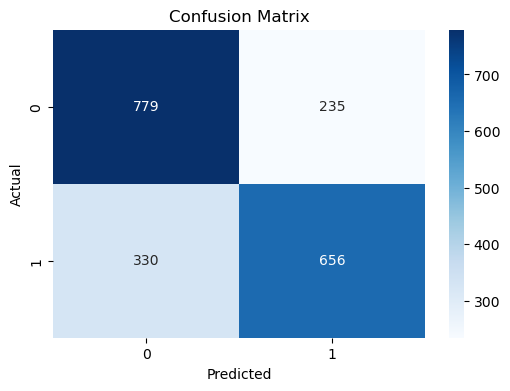

In [39]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = model.predict(X_test_scaled)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()